In [1]:
using Images
using Colors
using Interpolations

In [2]:
imgx = 1024
imgy = 1024;

In [3]:
img = zeros(RGB{Float64},imgx,imgy);

In [4]:
# Fläche auf der die Pixel berechnet werden
xa = -2
xb = 2
ya = -2
yb = 2

#Maximale Itterationszahl
maxIt = 256

#Skalierungsfunktion für die RGB Farbwerte
f = scaleminmax(0, maxIt)



# Randomisierte Rotationswinkel zur Konvertierung von 2D nach 4D


xy = rand() * 2 * pi
xz = rand() * 2 * pi
xw = rand() * 2 * pi
yz = rand() * 2 * pi
yw = rand() * 2 * pi
zw = rand() * 2 * pi
sxy = sin(xy)
cxy = cos(xy)
sxz = sin(xz)
cxz = cos(xz)
sxw = sin(xw)
cxw = cos(xw)
syz = sin(yz)
cyz = cos(yz)
syw = sin(yw)
cyw = cos(yw)
szw = sin(zw)
czw = cos(zw)
origx = (xa + xb) / 2
origy = (ya + yb) / 2

0.0

In [5]:
for ky = 0:imgx
    b = ky * (yb - ya) / (imgy - 1)  + ya
        for kx = 0:imgy
        a = kx * (xb - xa) / (imgx - 1)  + xa
        x = a
        y = b
        z = 0 # c = 0
        w = 0 # d = 0
        # 4 Dimensionale Rotation um das Zemtrum der Ebene 
        x = x - origx
        y = y - origy
        x0=x*cxy-y*sxy;y=x*sxy+y*cxy;x=x0 # xy-Ebene 
        x0=x*cxz-z*sxz;z=x*sxz+z*cxz;x=x0 # xz-Ebene 
        x0=x*cxw-z*sxw;w=x*sxw+z*cxw;x=x0 # xw-Ebene 
        y0=y*cyz-z*syz;z=y*syz+z*cyz;y=y0 # yz-Ebene 
        y0=y*cyw-w*syw;w=y*syw+w*cyw;y=y0 # yw-Ebene 
        z0=z*czw-w*szw;w=z*szw+w*czw;z=z0 # zw-Ebene 
        x = x + origx
        y = y + origy
        cx = x
        cy = y
        cz = z
        cw = w
         for i = 0:maxIt
            # suche in den Quaternionen
            x0 = x * x - y * y - z * z - w * w + cx
            y = 2 * x * y + cy
            z = 2 * x * z + cz
            w = 2 * x * w + cw
            x = x0
            if x * x + y * y + z * z + w * w > 4
                break
            end
            img[kx,ky]= RGB(f(i % 4 * 64), f(i % 8 * 32), f(i % 16 * 16))
         end
        end
end
save("imagecopy.jpg", img)

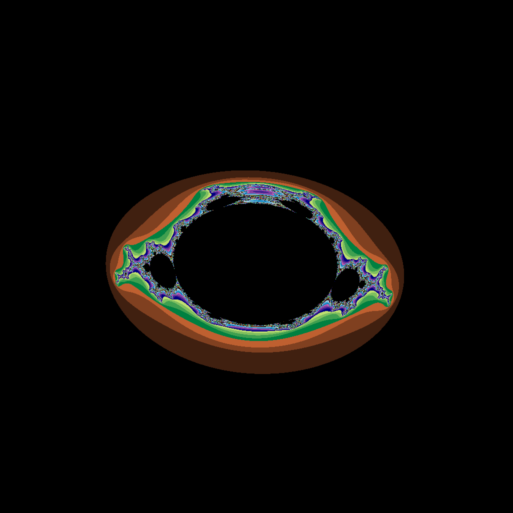

In [6]:
img
#out = colorview(RGB, img) 

In [7]:
#using TestImages

In [8]:
#img = testimage("mandrill")

In [9]:
#img[199,200]

In [10]:
#i = 230
#img[100,200] = RGB(f(i)^3,f(i)^2,f(i))
#img[100,200]

In [11]:
#tiled_img = Array{RGB{N0f8}, 2}(512,512)